In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import SpectralClustering
from matplotlib.lines import Line2D

### t-SNE & PCA Visualisation

In [2]:
json_file_path = 'amino_acid_to_embedding.json'

with open(json_file_path, 'r') as json_file:
    # Load the JSON data from the file
    aa_embeddings = json.load(json_file)

aa_embeddings.keys()

dict_keys(['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', '<OTHER>', '<START>', '<END>', '<PAD>'])

In [3]:
token_to_aminoacid = {'A': 'Alanine', 'R': 'Arginine', 'N': 'Asparagine', 'D': 'Aspartic Acid',
                      'C': 'Cysteine', 'E': 'Glutamic Acid', 'Q': 'Glutamine', 'G': 'Glycine', 
                      'H': 'Histidine', 'I': 'Isoleucine', 'L': 'Leucine', 'K': 'Lysine', 'M': 'Methionine',
                      'F': 'Phenylalanine', 'P': 'Proline', 'S': 'Serine', 'T': 'Threonine', 
                      'W': 'Tryptophan', 'Y': 'Tyrosine', 'V': 'Valine', 
                      'U': 'Selenocysteine', 'O': 'Pyrrolysine',
                      'X': 'Undefined Aminoacid', '<OTHER>': '<OTHER>',
                      '<START>' : '<START>', '<END>': '<END>', '<PAD>': '<PAD>'}

In [4]:
# Amino acids in prottrans embedding analyses
keys = sorted(['A','G','S','T','P','D','E','Q','N','H','R','K','M','L','I','V','W','Y','F','C']) # exclude 'X'
vectors = np.array([aa_embeddings[key] for key in keys])

In [5]:
# Source https://www.imgt.org/IMGTeducation/Aide-memoire/_UK/aminoacids/abbreviation.html 
aa_masses = {
    'A': 89,
    'R': 174,
    'N': 132,
    'D': 133,
    'C': 121,
    'E': 147,
    'Q': 146,
    'G': 75,
    'H': 155,
    'I': 131,
    'L': 131,
    'K': 146,
    'M': 149,
    'F': 165,
    'P': 115,
    'S': 105,
    'T': 119,
    'W': 204,
    'Y': 181,
    'V': 117,
    #Assign arbitrary number to non-standard tokens X, O, U, end, start, pad
    'X': 135,'O': 135,'U':135, "<END>":135, "<START>": 135, "<PAD>":135, "<OTHER>":135}

# https://www.sigmaaldrich.com/TR/en/technical-documents/technical-article/protein-biology/protein-structural-analysis/amino-acid-reference-chart
positive_charged_aas = ['R','K','H']
negative_charged_aas = ['E', 'D']
polar_neutral_aas = ['N','C','Q','S','T']
hydrophobic_aromatic_aas = ['F','W','Y']
hydrophobic_aliphatic_aas = [ 'A', 'I','L','M','V']
unique_aas= ['G','P']


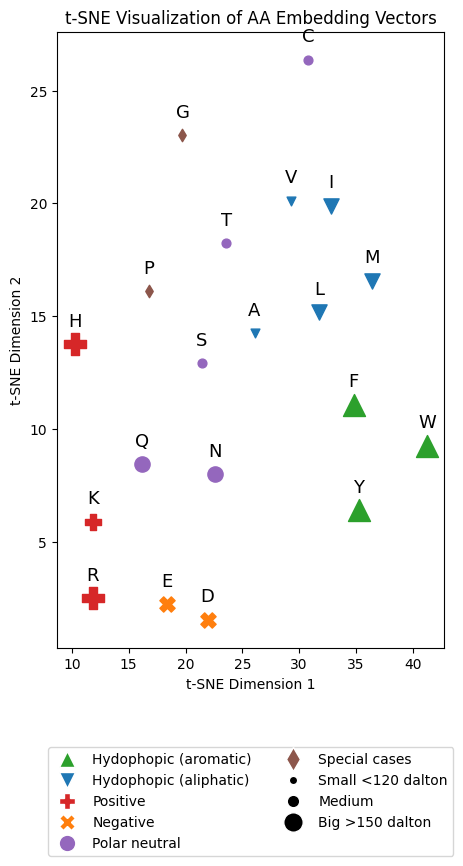

In [12]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=8,random_state=42)
tsne_result = tsne.fit_transform(vectors)


# Plot the t-SNE result with labels and colors according to the clusters
plt.figure(figsize=(5, 8))
for i, key in enumerate(keys):
    if aa_masses[key] < 130:
        marker_size = 40
    elif aa_masses[key] > 150:
        marker_size = 250
    else:
        marker_size = 120

    if key in  positive_charged_aas:
        marker = "P"
        color = "tab:red"      
    elif key in negative_charged_aas:
        marker = "X"
        color = "tab:orange"   
    elif key in  polar_neutral_aas:
        marker = "o"
        color = "tab:purple"
    elif key in hydrophobic_aromatic_aas:
        marker = "^"
        color = "tab:green"
    elif key in hydrophobic_aliphatic_aas:
        marker = "v"
        color = "tab:blue"
    elif key in unique_aas:
        marker = "d"
        color = "tab:brown"
    else:
        marker = "*"
        color = "k"
    plt.scatter(tsne_result[i, 0], tsne_result[i, 1], c=color,marker=marker, s=marker_size)

# Annotate each point with its corresponding key
for i, key in enumerate(keys):
    #amino_acid_symbol = amino_acid_symbols.get(key, key)
    plt.annotate(key, (tsne_result[i, 0], tsne_result[i, 1]),                 
                 xytext=(0, 10), fontsize = 13,
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.title('t-SNE Visualization of AA Embedding Vectors')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
legend_marker_size = 12
legend_elements = [Line2D([0], [0], marker='^', color='white', label='Hydophopic (aromatic)',markerfacecolor='tab:green', markersize=legend_marker_size),
                   Line2D([0], [0], marker='v', color='white', label='Hydophopic (aliphatic)',markerfacecolor='tab:blue', markersize=legend_marker_size),
                   Line2D([0], [0], marker='P', color='white', label='Positive',markerfacecolor='tab:red', markersize=legend_marker_size),
                   Line2D([0], [0], marker='X', color='white', label='Negative',markerfacecolor='tab:orange', markersize=legend_marker_size),
                   Line2D([0], [0], marker='o', color='white', label='Polar neutral',markerfacecolor='tab:purple', markersize=legend_marker_size),
                   Line2D([0], [0], marker='d', color='white', label='Special cases',markerfacecolor='tab:brown', markersize=legend_marker_size),
                   Line2D([0], [0], marker='o', color='white', label='Small <120 dalton',markerfacecolor='black', markersize=6),
                   Line2D([0], [0], marker='o', color='white', label='Medium',markerfacecolor='black', markersize=9),
                   Line2D([0], [0], marker='o', color='white', label='Big >150 dalton',markerfacecolor='black', markersize=14)]
plt.legend(handles=legend_elements,loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.savefig('high_resolution_plot.png', dpi=300)

plt.show()


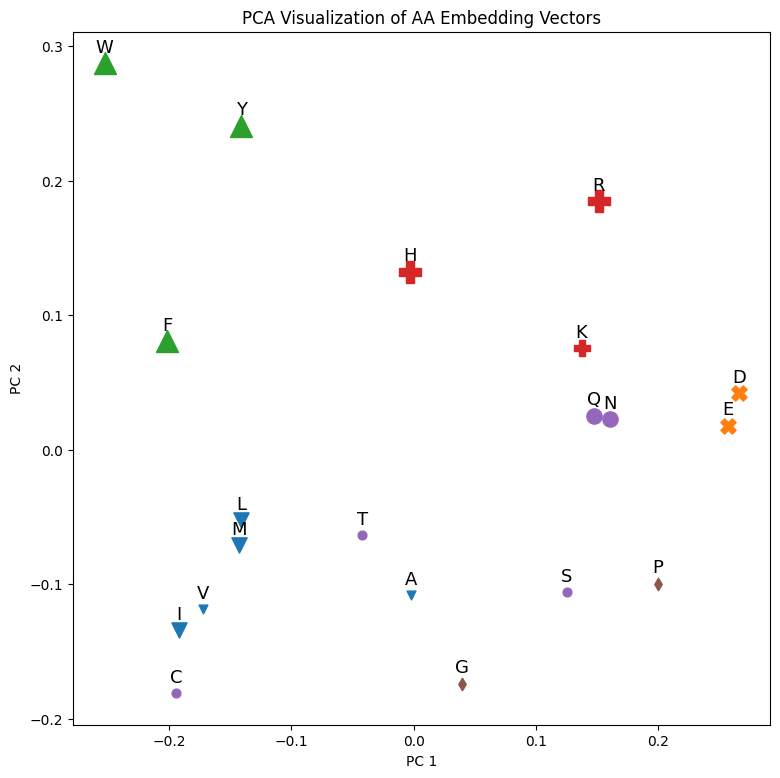

In [7]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(vectors)

# Plot the pca result with labels and colors according to the clusters
plt.figure(figsize=(9, 9))
for i, key in enumerate(keys):
    if aa_masses[key] < 130:
        marker_size = 40
    elif aa_masses[key] > 150:
        marker_size = 250
    else:
        marker_size = 120

    if key in  positive_charged_aas:
        marker = "P"
        color = "tab:red"      
    elif key in negative_charged_aas:
        marker = "X"
        color = "tab:orange"   
    elif key in  polar_neutral_aas:
        marker = "o"
        color = "tab:purple"
    elif key in hydrophobic_aromatic_aas:
        marker = "^"
        color = "tab:green"
    elif key in hydrophobic_aliphatic_aas:
        marker = "v"
        color = "tab:blue"
    elif key in unique_aas:
        marker = "d"
        color = "tab:brown"
    else:
        marker = "*"
        color = "k"
    plt.scatter(principal_components[i, 0], principal_components[i, 1], c=color,marker=marker, s=marker_size)

# Annotate each point with its corresponding key
for i, key in enumerate(keys):
    #amino_acid_symbol = amino_acid_symbols.get(key, key)
    plt.annotate(key, (principal_components[i, 0], principal_components[i, 1]),                 
                 xytext=(0, 5), fontsize = 13,
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.title('PCA Visualization of AA Embedding Vectors')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.savefig('high_resolution_plot.png', dpi=300)
plt.show()

### k-means

For k=2, silhouette score: 0.10666978043100281
For k=3, silhouette score: 0.0987317858310274
For k=4, silhouette score: 0.07016558493326655
For k=5, silhouette score: 0.07809824646159565
For k=6, silhouette score: 0.08194935948351431
For k=7, silhouette score: 0.09098795235334259
For k=8, silhouette score: 0.09364903226300184
For k=9, silhouette score: 0.0946179480649244
For k=10, silhouette score: 0.09087348522260755
For k=11, silhouette score: 0.07368149130228606


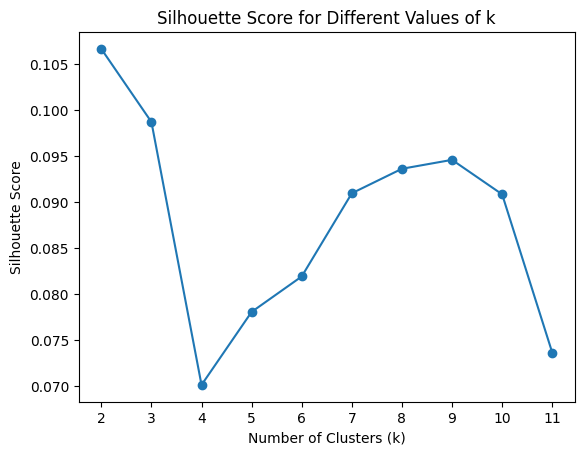

In [8]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt



# Define a range of k values
k_values = range(2, 12)

# Initialize lists to store silhouette scores for each k
silhouette_scores = []

# Iterate over each k value
for k in k_values:
    # Fit KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    cluster_labels = kmeans.fit_predict(vectors)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(vectors, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Print silhouette score for each k
    print(f"For k={k}, silhouette score: {silhouette_avg}")

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.xticks(range(2,12))
plt.ylabel('Silhouette Score')
plt.show()


c:\Users\efeka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\efeka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


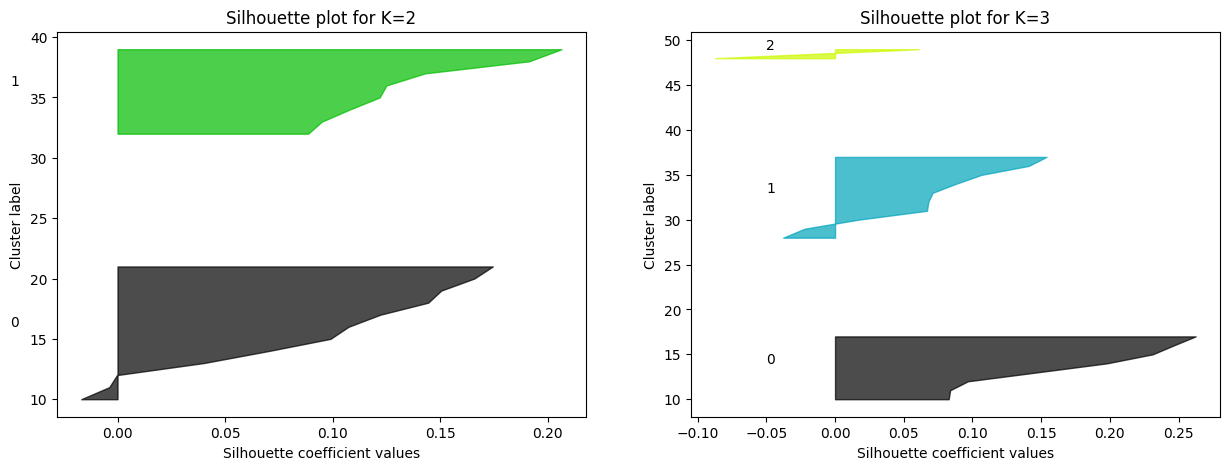

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

data = vectors
# Define the range of k values
k_values = range(2, 4)

# Create subplots for each k value
fig, ax = plt.subplots(1, len(k_values), figsize=(15, 5))

# Iterate over each k value
for i, k in enumerate(k_values):
    # Create a KMeans instance
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to your data
    cluster_labels = kmeans.fit_predict(data)
    
    # Calculate silhouette scores
    silhouette_avg = silhouette_score(data, cluster_labels)
    sample_silhouette_values = silhouette_samples(data, cluster_labels)
    
    # Plot silhouette plot
    y_lower = 10
    for j in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster j
        jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]

        # Sort the silhouette scores
        jth_cluster_silhouette_values.sort()

        # Calculate the height of the silhouette plot
        size_cluster_j = jth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        # Color the clusters
        color = plt.cm.nipy_spectral(float(j) / k)
        ax[i].fill_betweenx(np.arange(y_lower, y_upper),
                            0, jth_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax[i].text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Set labels and title
    ax[i].set_title(f"Silhouette plot for K={k}")
    ax[i].set_xlabel("Silhouette coefficient values")
    ax[i].set_ylabel("Cluster label")

plt.show()


c:\Users\efeka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


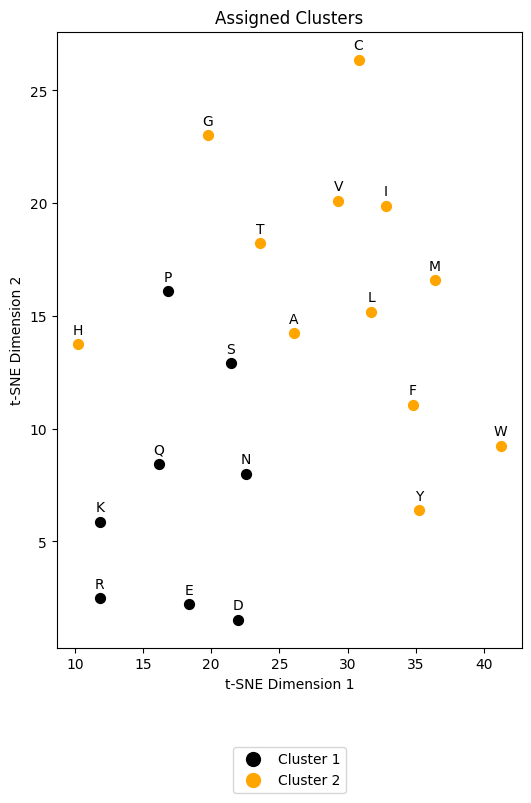

In [18]:

vectors = np.array([aa_embeddings[key] for key in keys])

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=8,random_state=42)
tsne_result = tsne.fit_transform(vectors)

# Apply k-means clustering
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_result = kmeans.fit_predict(vectors)

# Plot the t-SNE result with labels and colors according to the clusters
colors = ["orange","black"]
plt.figure(figsize=(6, 8))
for i in range(len(vectors)):
    plt.scatter(tsne_result[i, 0], tsne_result[i, 1], c=colors[kmeans_result[i]], marker="o" , s=50)

# Annotate each point with its corresponding key
for i, key in enumerate(keys):
    #amino_acid_symbol = amino_acid_symbols.get(key, key)
    plt.annotate(key, (tsne_result[i, 0], tsne_result[i, 1]),                 
                 xytext=(0, 5), 
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.title('Assigned Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster 1',markerfacecolor='black', markersize=12),
                   Line2D([0], [0], marker='o', color='w', label='Cluster 2',markerfacecolor='orange', markersize=12)]
plt.legend(handles=legend_elements,loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1)
plt.show()

c:\Users\efeka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


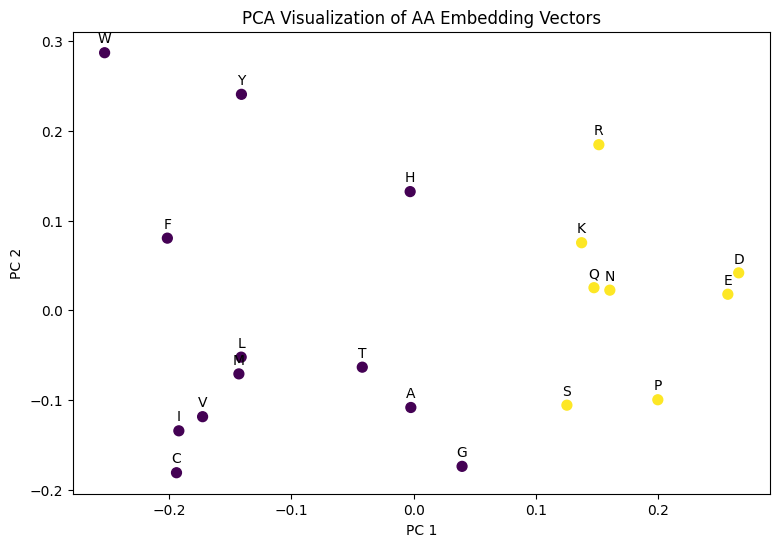

In [89]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(vectors)

# Apply k-means clustering
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_result = kmeans.fit_predict(vectors)

# Plot the t-SNE result with labels and colors according to the clusters
plt.figure(figsize=(9, 6))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans_result, marker="o" ,cmap='viridis', s=50)

# Annotate each point with its corresponding key
for i, key in enumerate(keys):
    #amino_acid_symbol = amino_acid_symbols.get(key, key)
    plt.annotate(key, (principal_components[i, 0], principal_components[i, 1]),                 
                 xytext=(0, 5), 
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.title('PCA Visualization of AA Embedding Vectors')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

### Spectral Clustering

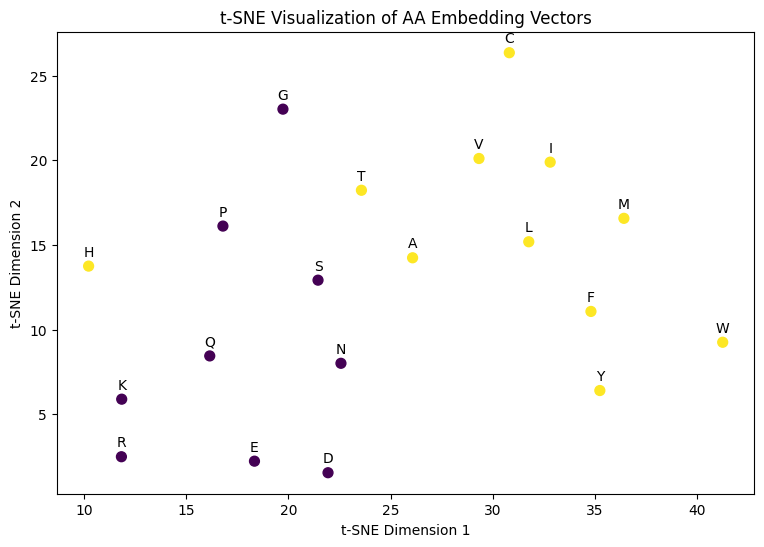

In [80]:
# Apply Spectral Clustering
n_clusters = 2
spectral_clustering = SpectralClustering(n_clusters=n_clusters, random_state=42)
cluster_labels = spectral_clustering.fit_predict(vectors)

# Plot the t-SNE result with labels and colors according to the clusters
plt.figure(figsize=(9, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='viridis', s=50)

# Annotate each point with its corresponding key
for i, key in enumerate(keys):
    #amino_acid_symbol = amino_acid_symbols.get(key, key)
    plt.annotate(key, (tsne_result[i, 0], tsne_result[i, 1]),                 
                 xytext=(0, 5), 
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.title('t-SNE Visualization of AA Embedding Vectors')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

### Hierarchical Clustering & Dendogram

In [38]:
aa_symbols = []
for symbol in amino_acid_symbols.values():
    aa_symbols.append(symbol)

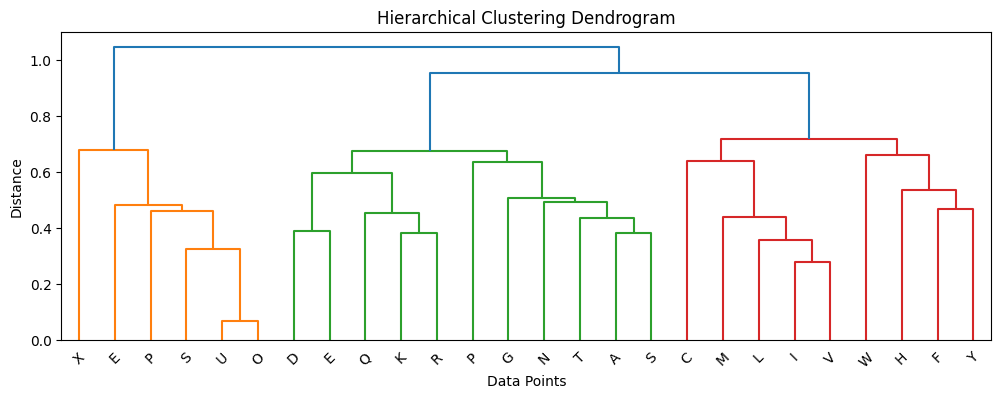

In [42]:
# Perform hierarchical clustering
linkage_matrix = linkage(vectors, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 4))
dendrogram(linkage_matrix, labels=aa_symbols)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
